## Regression: StatLib California Housing Data
http://www.dcc.fc.up.pt/~ltorgo/Regression/DataSets.html

** Dataset Information: **

This dataset contained 20,640 observations of information on the variables using all the block groups in California from the 1990 Census. In this sample a block group on average includes 1425.5 individuals living in a geographically compact area.

** Attribute Information: (6 features and 1 target)**

- housing Median Age
- total Rooms 
- total Bedrooms 
- population
- households
- median Income
- median House Value
 
** Objective of this project **

predict value of house based on the other features

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Load Data
df = pd.read_csv('cal_housing_clean.csv')

In [3]:
# Inspect Data
df.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [4]:
df.shape

(20640, 7)

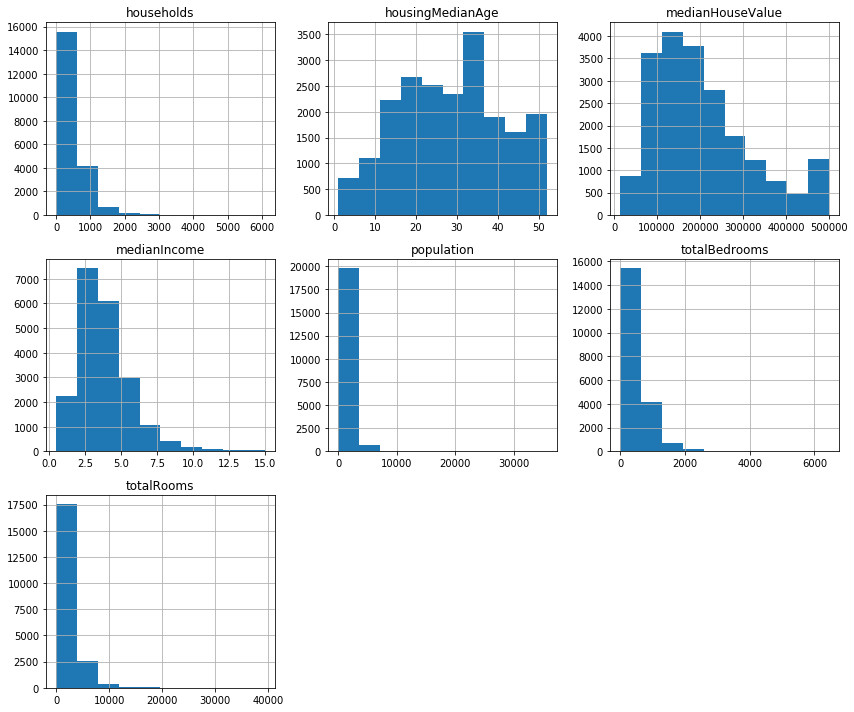

In [5]:
_ = df.hist(figsize=(12,10))
plt.tight_layout()

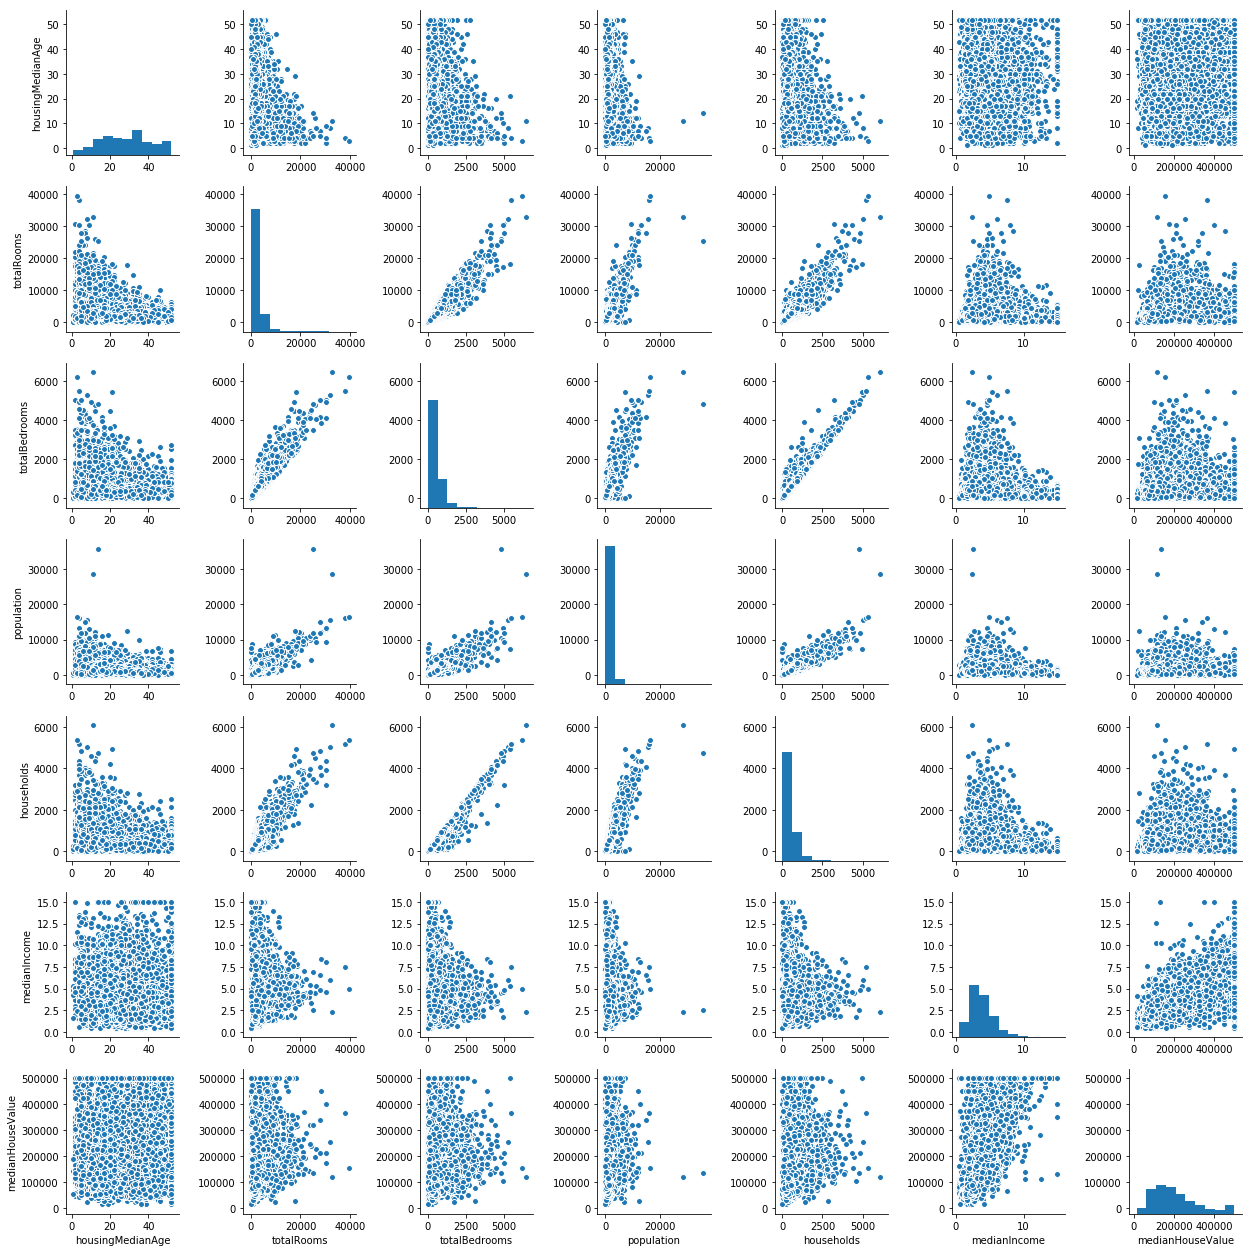

In [6]:
sns.pairplot(df)#, size=2.5)
plt.tight_layout()

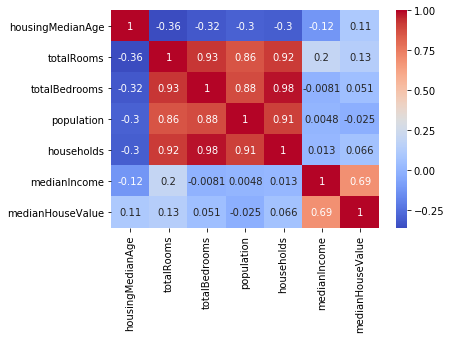

In [8]:
#plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
housingMedianAge    20640 non-null float64
totalRooms          20640 non-null float64
totalBedrooms       20640 non-null float64
population          20640 non-null float64
households          20640 non-null float64
medianIncome        20640 non-null float64
medianHouseValue    20640 non-null float64
dtypes: float64(7)
memory usage: 1.1 MB


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
housingMedianAge,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
totalRooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
totalBedrooms,20640.0,537.898014,421.247906,1.0000,295.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
medianIncome,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
medianHouseValue,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [11]:
df.isnull().any()

housingMedianAge    False
totalRooms          False
totalBedrooms       False
population          False
households          False
medianIncome        False
medianHouseValue    False
dtype: bool

## Data preprocessing

** Split Features & Class (or target) **

In [3]:
X = df.drop('medianHouseValue', axis=1).values
y = df['medianHouseValue'].values
print(X.shape,y.shape)

(20640, 6) (20640,)


** Split Train Test Sets **

In [4]:
seed = 101 #random seed for reproducibility
np.random.seed(seed)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 6) (4128, 6) (16512,) (4128,)


** Scale features **

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = sc_y.transform(y_test.reshape(-1, 1)).ravel()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 6) (4128, 6) (16512,) (4128,)


In [16]:
#from sklearn.preprocessing import MinMaxScaler
#sc_X = MinMaxScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

#sc_y = MinMaxScaler()
#y_train = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()
#y_test = sc_y.transform(y_test.reshape(-1, 1)).ravel()
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

## Baseline Model

#### SVM: best ML algorithm

In [7]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
#train model
model = SVR(kernel='rbf', C=30)
model.fit(X_train, y_train)
#evaluate model
print('SVM:')
print('MSE of train set: {:0.3f}'.format(mean_squared_error(y_train,model.predict(X_train))))
print('R^2 of train set: {:0.3f}'.format(r2_score(y_train,model.predict(X_train))))
print('MSE of test set: {:0.3f}'.format(mean_squared_error(y_test,model.predict(X_test))))
print('R^2 of test set: {:0.3f}'.format(r2_score(y_test,model.predict(X_test))))

SVM:
MSE of train set: 0.290
R^2 of train set: 0.710
MSE of test set: 0.336
R^2 of test set: 0.670


#### Baseline MLP Model

In [9]:
# Import libraries
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam,SGD,RMSprop
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold,GridSearchCV,cross_val_score

In [20]:
K.clear_session()
np.random.seed(seed) 
# train (and evaluate) model
model = Sequential()
model.add(Dense(20, input_shape=(X_train.shape[1],), activation='relu'))                    
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), 
                    epochs=100, verbose=0)
#evaluate model
print('Baseline model:')
print('MSE of train set: {:0.3f}'.format(mean_squared_error(y_train,model.predict(X_train))))
print('R^2 of train set: {:0.3f}'.format(r2_score(y_train,model.predict(X_train))))
print('MSE of test set: {:0.3f}'.format(mean_squared_error(y_test,model.predict(X_test))))
print('R^2 of test set: {:0.3f}'.format(r2_score(y_test,model.predict(X_test))))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________
Baseline model:
MSE of train set: 0.278
R^2 of train set: 0.722
MSE of test set: 0.326
R^2 of test set: 0.680


dict_keys(['val_loss', 'loss'])


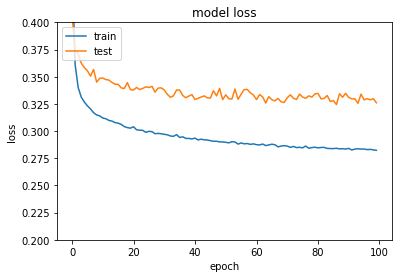

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.2,0.4])
plt.show()

## Parameter Tuning
tyr to improve model performance though the baseline already defeated SVM

#### Batch_size

In [25]:
# define a model
def create_model():
    model = Sequential()    
    model.add(Dense(20, input_shape=(X_train.shape[1],), activation='relu'))                    
    model.add(Dense(20, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Grid Search
K.clear_session()
np.random.seed(seed)
estimator = KerasRegressor(build_fn=create_model, nb_epoch=100, verbose=0)
kfold = KFold(n_splits=3, random_state=seed)
batch_size = [16,32]#,8]
param_grid = dict(batch_size=batch_size)
grid = GridSearchCV(estimator, param_grid=param_grid, cv=kfold,verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# GS Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    
print("Best: {:.3f} using {}" .format(grid_result.best_score_, grid_result.best_params_))

-0.325625 (0.005090) with: {'batch_size': 16}
-0.321484 (0.006386) with: {'batch_size': 32}
Best: -0.321 using {'batch_size': 32}


#### Initializer

In [26]:
# define a model
def create_model(init_mode='glorot_uniform'):
    model = Sequential()    
    model.add(Dense(20, kernel_initializer=init_mode,
                    input_shape=(X_train.shape[1],), activation='relu'))                    
    model.add(Dense(20, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(10, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model
batch_size = 32

# Grid Search
K.clear_session()
np.random.seed(seed)
estimator = KerasRegressor(build_fn=create_model, batch_size=batch_size, nb_epoch=100, verbose=0)
kfold = KFold(n_splits=3, random_state=seed)
init_mode = ['glorot_uniform','uniform','he_normal']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator, param_grid=param_grid, cv=kfold,verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# GS Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    
print("Best: {:.3f} using {}" .format(grid_result.best_score_, grid_result.best_params_))

-0.325886 (0.004406) with: {'init_mode': 'glorot_uniform'}
-0.334101 (0.007597) with: {'init_mode': 'uniform'}
-0.336640 (0.007787) with: {'init_mode': 'he_normal'}
Best: -0.326 using {'init_mode': 'glorot_uniform'}


#### Optimizer

In [28]:
# define a model
def create_model(optimizer='adam',init_mode='glorot_uniform'):
    model = Sequential()    
    model.add(Dense(20, kernel_initializer=init_mode,
                    input_shape=(X_train.shape[1],), activation='relu'))                    
    model.add(Dense(20, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(10, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model
batch_size = 32

# Grid Search
K.clear_session()
np.random.seed(seed)
estimator = KerasRegressor(build_fn=create_model, batch_size=batch_size, nb_epoch=100, verbose=0)
kfold = KFold(n_splits=3, random_state=seed)
optimizer = ['adam','rmsprop','sgd']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator, param_grid=param_grid, cv=kfold,verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# GS Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    
print("Best: {:.3f} using {}" .format(grid_result.best_score_, grid_result.best_params_))

-0.326145 (0.005005) with: {'optimizer': 'adam'}
-0.320943 (0.006899) with: {'optimizer': 'rmsprop'}
-0.337302 (0.010222) with: {'optimizer': 'sgd'}
Best: -0.321 using {'optimizer': 'rmsprop'}


#### Activation Function

In [32]:
# define a model
def create_model(activation='relu',optimizer='rmsprop',init_mode='glorot_uniform'):
    model = Sequential()    
    model.add(Dense(20, kernel_initializer=init_mode,
                    input_shape=(X_train.shape[1],), activation=activation))                    
    model.add(Dense(20, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(10, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model
batch_size=32

# Grid Search
K.clear_session()
np.random.seed(seed)
estimator = KerasRegressor(build_fn=create_model, batch_size=batch_size, nb_epoch=100, verbose=0)
kfold = KFold(n_splits=3, random_state=seed)
activation = ['relu','tanh','linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator, param_grid=param_grid, cv=kfold,verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# GS Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    
print("Best: {:.3f} using {}" .format(grid_result.best_score_, grid_result.best_params_))

-0.321551 (0.013384) with: {'activation': 'relu'}
-0.321337 (0.017119) with: {'activation': 'tanh'}
-0.449237 (0.015577) with: {'activation': 'linear'}
Best: -0.321 using {'activation': 'tanh'}


#### Dropout

In [33]:
# define a model
def create_model(dropout_rate=0.0,activation='tanh',optimizer='rmsprop',
                 init_mode='glorot_uniform'):
    model = Sequential()    
    model.add(Dense(20, kernel_initializer=init_mode,
                    input_shape=(X_train.shape[1],), activation=activation))                    
    model.add(Dense(20, kernel_initializer=init_mode, activation=activation))
    model.add(Dense(10, kernel_initializer=init_mode, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model
batch_size=32

# Grid Search
K.clear_session()
np.random.seed(seed)
estimator = KerasRegressor(build_fn=create_model, batch_size=batch_size, nb_epoch=100, verbose=0)
kfold = KFold(n_splits=3, random_state=seed)
dropout_rate = [0.0,0.2,0.4]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator, param_grid=param_grid, cv=kfold,verbose=0) #n_jobs=-1,
grid_result = grid.fit(X_train,y_train,verbose=0)

# GS Results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    
print("Best: {:.3f} using {}" .format(grid_result.best_score_, grid_result.best_params_))

-0.338824 (0.019319) with: {'dropout_rate': 0.0}
-0.349383 (0.005307) with: {'dropout_rate': 0.2}
-0.351769 (0.014223) with: {'dropout_rate': 0.4}
Best: -0.339 using {'dropout_rate': 0.0}


#### Tuned Model & Learning Curve

In [44]:
K.clear_session()
np.random.seed(seed) 
# train (and evaluate) model
model = Sequential()
model.add(Dense(20, kernel_initializer='glorot_uniform',
                input_shape=(X_train.shape[1],), activation='tanh'))                    
model.add(Dense(20, kernel_initializer='glorot_uniform', activation='tanh'))
model.add(Dense(10, kernel_initializer='glorot_uniform', activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mean_squared_error')
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), 
                    epochs=200, batch_size=32, verbose=0)
#evaluate model
print('Tuned model:')
print('MSE of train set: {:0.3f}'.format(mean_squared_error(y_train,model.predict(X_train))))
print('R^2 of train set: {:0.3f}'.format(r2_score(y_train,model.predict(X_train))))
print('MSE of test set: {:0.3f}'.format(mean_squared_error(y_test,model.predict(X_test))))
print('R^2 of test set: {:0.3f}'.format(r2_score(y_test,model.predict(X_test))))

Tuned model:
MSE of train set: 0.280
R^2 of train set: 0.720
MSE of test set: 0.322
R^2 of test set: 0.684


dict_keys(['val_loss', 'loss'])


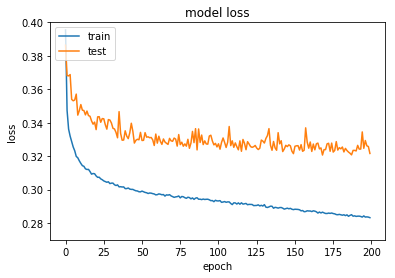

In [45]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.27,0.4])
plt.show()

# Final Model

#### Params: kernel_initializer='glorot_uniform', activation='tanh',  optimizer='rmsprop', epochs=200, batch_size=32

In [46]:
K.clear_session()
np.random.seed(seed) 
# train (and evaluate) model
model = Sequential()
model.add(Dense(20, kernel_initializer='glorot_uniform',
                input_shape=(X_train.shape[1],), activation='tanh'))                    
model.add(Dense(20, kernel_initializer='glorot_uniform', activation='tanh'))
model.add(Dense(10, kernel_initializer='glorot_uniform', activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)
#evaluate model on train set
print('MSE of train set: {:0.3f}'.format(mean_squared_error(y_train,model.predict(X_train))))
print('R^2 of train set: {:0.3f}'.format(r2_score(y_train,model.predict(X_train))))

MSE of train set: 0.280
R^2 of train set: 0.720


** Save and load the final model to JSON or YAML ** https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

** 1) JSON **

In [47]:
# save model as JSON
filename = 'model'
# model architecture
model_json = model.to_json()
with open(filename+'.json', 'w') as json_file:
    json_file.write(model_json)
# model weghts
model.save(filename+'.h5')
print('Saved model in',filename+'.json,',filename+'.h5')

Saved model in model.json, model.h5


In [48]:
#del model

In [49]:
#load model from JSON
filename = 'model'
# model architecture
from keras.models import model_from_json
json_file = open(filename+'.json', 'r')
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
# model weghts
model.load_weights(filename+'.h5')
print('Loaded model from',filename+'.json,',filename+'.h5')
print(model.summary())

Loaded model from model.json, model.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
#evaluate model on train set
print('MSE of train set: {:0.3f}'.format(mean_squared_error(y_train,model.predict(X_train))))
print('R^2 of train set: {:0.3f}'.format(r2_score(y_train,model.predict(X_train))))

MSE of train set: 0.280
R^2 of train set: 0.720


** 2) YAML **

In [51]:
# save model as YAML
filename = 'model'
# model architecture
model_yaml= model.to_yaml()
with open(filename+'.yaml', 'w') as yaml_file:
    yaml_file.write(model_yaml)
# model weghts
model.save(filename+'.h5')
print('Saved model in',filename+'.yaml,',filename+'.h5')

Saved model in model.yaml, model.h5


In [52]:
#load model from YAML
filename = 'model'
# model architecture
from keras.models import model_from_yaml
yaml_file = open(filename+'.json', 'r')
model_yaml = yaml_file.read()
yaml_file.close()
model = model_from_yaml(model_yaml)
# model weghts
model.load_weights(filename+'.h5')
print('Loaded model from',filename+'.yaml,',filename+'.h5')
print(model.summary())

Loaded model from model.yaml, model.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
#evaluate model on train set
print('MSE of train set: {:0.3f}'.format(mean_squared_error(y_train,model.predict(X_train))))
print('R^2 of train set: {:0.3f}'.format(r2_score(y_train,model.predict(X_train))))

MSE of train set: 0.280
R^2 of train set: 0.720


## Model Evaluation with Test set

In [54]:
# predict class with test set (new, unseen)
y_pred = model.predict(X_test,verbose=0)
print('MSE of test set: {:0.3f}'.format(mean_squared_error(y_test,y_pred)))
print('R^2 of test set: {:0.3f}'.format(r2_score(y_test,y_pred)))

MSE of test set: 0.322
R^2 of test set: 0.684


Text(0,0.5,'Predicted')

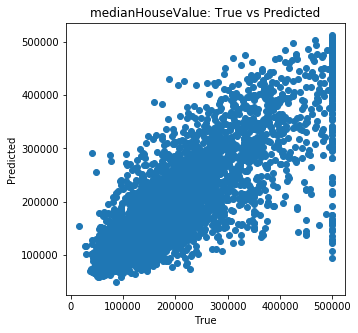

In [64]:
plt.figure(figsize=(5,5))
plt.scatter(sc_y.inverse_transform(y_test),sc_y.inverse_transform(y_pred))
plt.title('medianHouseValue: True vs Predicted')
plt.xlabel('True')
plt.ylabel('Predicted')

Text(0.5,1,'medianHouseValue: Error Distribution')

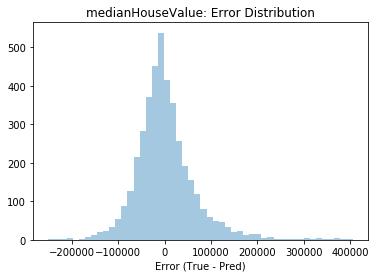

In [65]:
sns.distplot((sc_y.inverse_transform(y_test)-sc_y.inverse_transform(y_pred).ravel()),
              bins=50, kde=False, axlabel='Error (True - Pred)')
plt.title('medianHouseValue: Error Distribution')

# Summary

 - Model Architecture: 3 hidden layers (20,20,10 nodes for each layer)


- Best params: kernel_initializer='glorot_uniform', activation='tanh',  optimizer='rmsprop', epochs=200, batch_size=32


- MSE / R2 score of test set: ** 0.322 / 0.684 **